# AIT Development notebook


## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|3|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit(second cell, you set use modules.)|
| 4|import|2|you should write use import modules.<br>but bottom lines do not edit.|should edit(first cell, you import your moduel.)|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

## notebook template revision history

### 1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

### 1.0.0 2020/10/12

* new cerarion

In [1]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from glob import glob
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

In [3]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

In [4]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    requirements_generator._package_list = []
    requirements_generator.add_package('matplotlib', '3.3.0')
    requirements_generator.add_package('numpy', '1.22.0')
    requirements_generator.add_package('pandas', '1.3.1')
    requirements_generator.add_package('scikit-learn', '1.1.3')
    requirements_generator.add_package('scipy', '1.7.0')
    requirements_generator.add_package('seaborn', '0.10.1')
    requirements_generator.add_package('tensorflow', '2.7.3')
    requirements_generator.add_package('tensorflow-estimator', '2.7.0')
    requirements_generator.add_package('tensorflow-cpu', '2.7.3')

In [5]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.20-py3-none-any.whl (from -r /workdir/root/develop/requirements.txt (line 10))
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 7.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 8.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 7.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 7.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 7.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.5/495.5 MB 3.5 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 kB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.7/185.7 MB 4.7 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for pytz>=2017.3 from https://files.pythonhosted.org/pack

In [6]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
from typing import List
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import interp
from itertools import cycle
from os import makedirs, path

from ait_sdk.utils import get_summary_text
from ait_sdk.utils.mnist import MNIST

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

2023-09-28 02:16:53.877533: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-28 02:16:53.877567: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
#########################################
# area:import
# do not edit
#########################################

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [8]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_model_image_classify_acc_adversarial_example')
    manifest_genenerator.set_ait_description('入力画像から敵対的サンプル画像を生成し、入力モデル(入力画像で学習させた画像分類モデル）の精度情報(Accuracy,Precision,Recall,F値,AUC)を算出する\nこれらの精度情報から、機械学習モデルの正確性・安定性を評価することができる。')
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_eval_model_image_classify_acc_adversarial_example')
    manifest_genenerator.set_ait_version('0.2')
    manifest_genenerator.add_ait_keywords('images')
    manifest_genenerator.add_ait_keywords('image classification')
    manifest_genenerator.add_ait_keywords('adversarial_example')
    manifest_genenerator.add_ait_keywords('Accuracy')
    manifest_genenerator.add_ait_keywords('Precision')
    manifest_genenerator.add_ait_keywords('Recall')
    manifest_genenerator.add_ait_keywords('F')
    manifest_genenerator.add_ait_keywords('AUC')
    manifest_genenerator.add_ait_keywords('ConfusionMatrix')
    manifest_genenerator.add_ait_licenses('Apache License Version 2.0')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/AIQM_Guideline/Robustness_of_trained_model')

    inventory_requirement_trained_model = manifest_genenerator.format_ait_inventory_requirement(format_=['h5'])
    manifest_genenerator.add_ait_inventories(name='trained_model', 
                                             type_='model', 
                                             description='Tensorflow 2.3で学習したモデル', 
                                             requirement=inventory_requirement_trained_model)
    
    inventory_requirement_test_set_images = manifest_genenerator.format_ait_inventory_requirement(format_=['gz'])
    manifest_genenerator.add_ait_inventories(name='test_set_images', 
                                            type_='dataset', 
                                            description='テスト画像セット（MNISTフォーマット）', 
                                            requirement=inventory_requirement_test_set_images)
    
    inventory_requirement_test_set_labels = manifest_genenerator.format_ait_inventory_requirement(format_=['gz'])
    manifest_genenerator.add_ait_inventories(name='test_set_labels', 
                                            type_='dataset', 
                                            description='テスト画像ラベル（MNISTフォーマット）', 
                                            requirement=inventory_requirement_test_set_labels)

    manifest_genenerator.add_ait_parameters(name='epsilon', 
                                            type_='float', 
                                            description='adversarial exampleの摂動パラメータ', 
                                            default_val='0.01',
                                            min_value='0')
    manifest_genenerator.add_ait_parameters(name='class_count', 
                                            type_='int', 
                                            description='ラベル属性の属性値数', 
                                            default_val='10',
                                            min_value='2',
                                            max_value='99')
    manifest_genenerator.add_ait_parameters(name='auc_average', 
                                            type_='str', 
                                            description='ROC曲線を計算するためのパラメータ\n{‘micro’, ‘macro’, ‘samples’, ‘weighted’}\n詳細:sklearn.metrics.roc_auc_scoreのaverageパラメータ\nref:\nhttps://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html', 
                                            default_val='macro')
    manifest_genenerator.add_ait_parameters(name='auc_multi_class', 
                                            type_='str', 
                                            description='ROC曲線を計算するためのパラメータ\n{‘raise’, ‘ovr’, ‘ovo’}\n詳細:sklearn.metrics.roc_auc_scoreのmulti_classパラメータ\nref:\nhttps://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html', 
                                            default_val='raise')

    manifest_genenerator.add_ait_measures(name='Accuracy', 
                                          type_='float', 
                                          description='モデルのAccuracy', 
                                          structure='single',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='Precision', 
                                          type_='float', 
                                          description='モデルのPrecision', 
                                          structure='single',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='Recall', 
                                          type_='float', 
                                          description='モデルのRecall', 
                                          structure='single',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='F−measure', 
                                          type_='float', 
                                          description='モデルのF値', 
                                          structure='single',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='AUC', 
                                          type_='float', 
                                          description='モデルのAUC', 
                                          structure='single',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='AccuracyByClass', 
                                          type_='float', 
                                          description='モデルの各クラスごとのAccuracy', 
                                          structure='sequence',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='PrecisionByClass', 
                                          type_='float', 
                                          description='モデルの各クラスごとのPrecision', 
                                          structure='sequence',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='RecallByClass', 
                                          type_='float', 
                                          description='モデルの各クラスごとのRecall', 
                                          structure='sequence',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='F−measureByClass', 
                                          type_='float', 
                                          description='モデルの各クラスごとのF値', 
                                          structure='sequence',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_resources(name='ConfusionMatrixHeatmap', 
                                           type_='picture', 
                                           description='混同行列(ヒートマップ)')
    manifest_genenerator.add_ait_resources(name='ROC-curve', 
                                           type_='picture', 
                                           description='ROC曲線')

    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_genenerator.add_ait_downloads(name='ConfusionMatrixCSV', 
                                           description='混合行列(csv)')
    manifest_genenerator.add_ait_downloads(name='PredictionResult', 
                                           description='モデルの推論結果\nID,正解ラベル,推論結果確率(ラベル毎)')

    manifest_path = manifest_genenerator.write()

In [9]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='trained_model',
                                        value='trained_model/model_1.h5')
    input_generator.add_ait_inventories(name='test_set_images',
                                        value='test_set_images/t10k-images-idx3-ubyte.gz')
    input_generator.add_ait_inventories(name='test_set_labels',
                                        value='test_set_labels/t10k-labels-idx1-ubyte.gz')

    input_generator.set_ait_params(name='epsilon',
                                   value='0.1')
    input_generator.set_ait_params(name='class_count',
                                   value='10')
    input_generator.set_ait_params(name='auc_average',
                                   value='macro')
    input_generator.set_ait_params(name='auc_multi_class',
                                   value='raise')

    input_generator.write()

In [10]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [11]:
class ACCCalculator:
    """
    精度を計算する

    accuracy calculator
    """

    def normalize_y_pred(self, y_pred):
        return K.one_hot(K.argmax(y_pred), y_pred.shape[-1])

    def class_true_positive(self, class_label, y_true, y_pred):
        y_pred = self.normalize_y_pred(y_pred)
        return K.cast(K.equal(y_true[:, class_label] + y_pred[:, class_label], 2),
                    K.floatx())

    def class_precision(self, class_label, y_true, y_pred):
        y_pred = self.normalize_y_pred(y_pred)
        return K.sum(self.class_true_positive(class_label, y_true, y_pred)) / (K.sum(y_pred[:, class_label]) + K.epsilon())

    def all_class_precision(self, y_true, y_pred):
        return [self.class_precision(i, y_true, y_pred) for i in range(y_pred.shape[-1])]

    def macro_precision(self, y_true, y_pred):
        class_count = y_pred.shape[-1]
        return K.sum([self.class_precision(i, y_true, y_pred) for i in range(class_count)]) \
            / K.cast(class_count, K.floatx())

    def class_recall(self, class_label, y_true, y_pred):
        return K.sum(self.class_true_positive(class_label, y_true, y_pred)) / (K.sum(y_true[:, class_label]) + K.epsilon())

    def all_class_recall(self, y_true, y_pred):
        return [self.class_recall(i, y_true, y_pred) for i in range(y_pred.shape[-1])]

    def macro_recall(self, y_true, y_pred):
        class_count = y_pred.shape[-1]
        return K.sum([self.class_recall(i, y_true, y_pred) for i in range(class_count)]) \
            / K.cast(class_count, K.floatx())

    def class_accuracy(self, class_label, y_true, y_pred):
        y_pred = self.normalize_y_pred(y_pred)
        return K.cast(K.equal(y_true[:, class_label], y_pred[:, class_label]),
                    K.floatx())

    def all_class_accuracy(self, y_true, y_pred):
        return [np.mean(self.class_accuracy(i, y_true, y_pred)) for i in range(y_pred.shape[-1])]

    def average_accuracy(self, y_true, y_pred):
        class_count = y_pred.shape[-1]
        class_acc_list = [self.class_accuracy(i, y_true, y_pred) for i in range(class_count)]
        class_acc_matrix = K.concatenate(class_acc_list, axis=0)
        return K.mean(class_acc_matrix, axis=0)

    def class_f_measure(self, class_label, y_true, y_pred):
        precision = self.class_precision(class_label, y_true, y_pred)
        recall = self.class_recall(class_label, y_true, y_pred)
        return (2 * precision * recall) / (precision + recall + K.epsilon())

    def all_class_f_measure(self, y_true, y_pred):
        return [self.class_f_measure(i, y_true, y_pred) for i in range(y_pred.shape[-1])]

    def macro_f_measure(self, y_true, y_pred):
        precision = self.macro_precision(y_true, y_pred)
        recall = self.macro_recall(y_true, y_pred)
        return (2 * precision * recall) / (precision + recall + K.epsilon())

In [12]:
#########################################
# area:functions
# should edit
#########################################
# 1/8

@log(logger)
@measures(ait_output, 'Accuracy', 'Precision', 'Recall', 'F−measure')
def calc_acc_all(y_test, y_pred) -> (float, float, float, float):
    calc = ACCCalculator()
    one_hot_y = to_categorical(y_test)

    return calc.average_accuracy(one_hot_y, y_pred).numpy() , \
           calc.macro_precision(one_hot_y, y_pred).numpy() , \
           calc.macro_recall(one_hot_y, y_pred).numpy() , \
           calc.macro_f_measure(one_hot_y, y_pred).numpy()

In [13]:
#########################################
# area:functions
# should edit
#########################################
# 2/8

@log(logger)
@measures(ait_output, 'AccuracyByClass', 'PrecisionByClass', 'RecallByClass', 'F−measureByClass', is_many=True)
def calc_acc_by_class( y_test, y_pred) -> (List[float], List[float], List[float], List[float]):
    calc = ACCCalculator()
    one_hot_y = to_categorical(y_test)

    return calc.all_class_accuracy(one_hot_y, y_pred) , \
           [v.numpy() for v in calc.all_class_precision(one_hot_y, y_pred)] , \
           [v.numpy() for v in calc.all_class_recall(one_hot_y, y_pred)] , \
           [v.numpy() for v in calc.all_class_f_measure(one_hot_y, y_pred)]

In [14]:
#########################################
# area:functions
# should edit
#########################################
# 3/8

@log(logger)
@downloads(ait_output, path_helper, 'ConfusionMatrixCSV', 'confusion_matrix.csv')
def save_confusion_matrix_csv(y_test, y_pred, file_path: str=None) -> None:
    cmx_data = confusion_matrix(y_test, K.argmax(y_pred))
    logger.info(cmx_data)
    np.savetxt(file_path, cmx_data, fmt='%d', delimiter=',')

In [15]:
#########################################
# area:functions
# should edit
#########################################
# 4/8

@log(logger)
@resources(ait_output, path_helper, 'ConfusionMatrixHeatmap', 'confusion_matrix.png')
def save_confusion_matrix_heatmap(y_test, y_pred, file_path: str=None) -> None:
    y_pred = K.argmax(y_pred)

    labels = sorted(list(set(y_test)))
    cmx_data = confusion_matrix(y_test, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig = plt.figure(dpi=100, figsize=(8,6))
    sn.heatmap(df_cmx, annot=True, fmt='g' ,square = True)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Predicted class')
    ax.set_ylabel('Actual class')
    ax.set_title('Plot of Confusion Matrix')

    # save as png
    plt.savefig(file_path)

In [16]:
#########################################
# area:functions
# should edit
#########################################
# 5/8

@log(logger)
@resources(ait_output, path_helper, 'ROC-curve', 'roc_curve.png')
def save_roc_curve(y_test, y_pred, n_classes: int, file_path: str=None) -> None:
    y_true = to_categorical(y_test)
    y_score = y_pred

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(dpi=100, figsize=(8,6))
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['#1f77b4',
                    '#ff7f0e',
                    '#2ca02c',
                    '#d62728',
                    '#9467bd',
                    '#8c564b',
                    '#e377c2',
                    '#7f7f7f',
                    '#bcbd22',
                    '#17becf'])

    #colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.savefig(file_path)

In [17]:
#########################################
# area:functions
# should edit
#########################################
# 6/8

@log(logger)
@measures(ait_output, 'AUC')
def calc_auc(y_test, y_pred, multi_class: str, average: str) -> float:
    y_true = to_categorical(y_test)
    y_score = y_pred

    return roc_auc_score(y_true, y_score,
                         multi_class=multi_class,
                         average=average)

In [18]:
#########################################
# area:functions
# should edit
#########################################
# 7/8

@log(logger)
@downloads(ait_output, path_helper, 'PredictionResult', 'prediction.csv')
def save_prediction_result(y_test, y_pred, file_path: str=None) -> None:
    # Label + PredictProva
    out_data = np.hstack([y_test.reshape(y_test.shape[0], 1), y_pred])

    index = [str(i) for i in range(1, y_test.shape[0]+1)]
    columns = ['Label']+[f'PredictionProva_Class_{i}' for i in range(1,y_pred.shape[1]+1)]
    df = pd.DataFrame(data=out_data, index=index, columns=columns, dtype='float')

    df.to_csv(file_path)

In [19]:
#########################################
# area:functions
# should edit
#########################################
# 8/8

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> None:
    shutil.move(get_log_path(), file_path)

In [20]:
def create_adversarial_images(input_images, input_label, model, epsilon):
    loss_object = tf.keras.losses.CategoricalCrossentropy()
    labels = tf.one_hot(input_label, depth=len(np.unique(input_label)), dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(input_images)
        predictions = model(input_images)
        loss = loss_object(labels, predictions)

        gradient = tape.gradient(loss, input_images) # Get the gradients of the loss w.r.t to the input image.
        signed_grad = tf.sign(gradient) # Get the sign of the gradients to create the perturbation

        adv_image = input_images + epsilon * signed_grad
        adv_image = tf.clip_by_value(adv_image, 0, 1)
  
    return adv_image

In [21]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper, is_ait_launch)
def main() -> None:
    image_px_size = 28

    # インベントリのMNISTラベル・画像を読み込み
    mnist = MNIST()
    X_test = mnist.load_image(ait_input.get_inventory_path('test_set_images'), image_px_size)
    y_test = mnist.load_label(ait_input.get_inventory_path('test_set_labels'))

    # 前処理として、画像を最大値255で割って0.0 - 1.0に規格化
    X_test_normalize = X_test / 255

    # モデル読み込み
    model = tf.keras.models.load_model(ait_input.get_inventory_path('trained_model'))
    logger.info(get_summary_text(model))
    
    # 敵対的サンプル画像生成
    data_tf = tf.convert_to_tensor(X_test_normalize, np.float32)
    adv_x = create_adversarial_images(data_tf, y_test, model, epsilon=ait_input.get_method_param_value('epsilon'))
    
    # 推論
    y_pred = model.predict(adv_x)

    # 全体精度評価値(measure)
    calc_acc_all(y_test=y_test, y_pred=y_pred)

    # クラス別精度評価値(measure)
    calc_acc_by_class(y_test=y_test, y_pred=y_pred)

    # 混同行列(CSV)
    save_confusion_matrix_csv(y_test=y_test, y_pred=y_pred)

    # 混同行列(PNG)
    save_confusion_matrix_heatmap(y_test=y_test, y_pred=y_pred)

    # ROC曲線(PNG)
    save_roc_curve(y_test=y_test, y_pred=y_pred, 
                    n_classes=ait_input.get_method_param_value('class_count'))

    # AUC(measure)
    calc_auc(y_test=y_test, y_pred=y_pred,
              multi_class=ait_input.get_method_param_value('auc_multi_class'),
              average=ait_input.get_method_param_value('auc_average'))

    # PredictionResult(CSV)
    save_prediction_result(y_test=y_test, y_pred=y_pred)

    # log(Text)
    move_log()

2023-09-28 02:16:58.003861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-28 02:16:58.003899: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-28 02:16:58.003924: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (35495c4e4f76): /proc/driver/nvidia/version does not exist
2023-09-28 02:16:58.004162: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/tmp/ipykernel_29/4279075234.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a

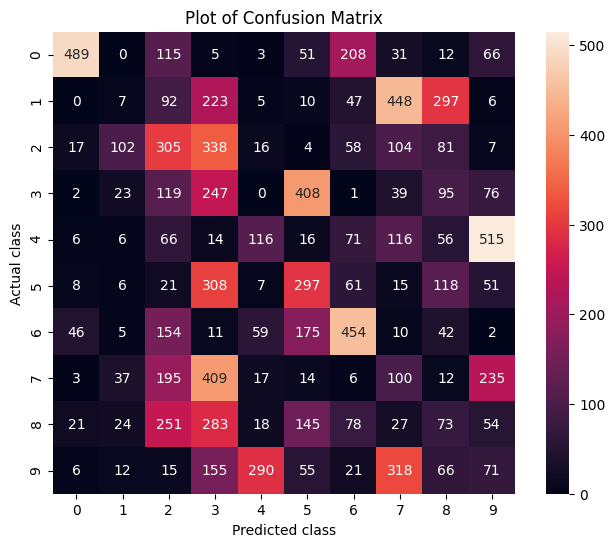

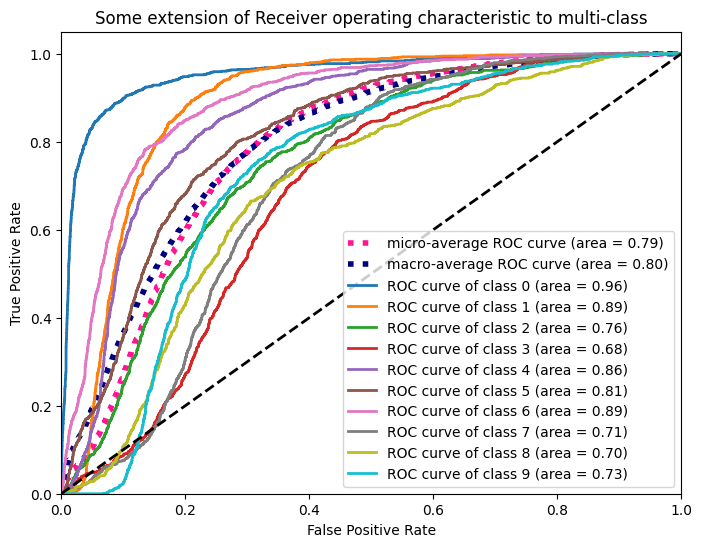

In [22]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [23]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2020'

In [24]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
